# 🐍Day 2_Simple Linear Regression

## Step 1: Data Preprocessing

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
df = pd.read_csv('https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/studentscores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [34]:
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state=0)

## Step 2: Fitting Simple Linear Regression Model to the training set

In [23]:
print(X_train.shape)
print(Y_train.shape)

(18,)
(18,)


In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train.reshape(-1, 1),Y_train)

## Step 3: Predecting the Result

In [30]:
Y_pred = regressor.predict(X_test.reshape(-1,1))

## Step 4: Visualization

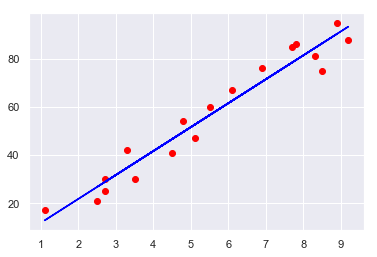

In [32]:
import seaborn as sns; sns.set()
plt.scatter(X_train,Y_train,color="red")
plt.plot(X_train, regressor.predict(X_train.reshape(-1,1)),color="blue")

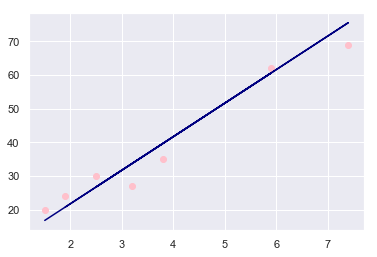

In [37]:
plt.scatter(X_test,Y_test,color="pink")
plt.plot(X_test,regressor.predict(X_test.reshape(-1,1)),color="navy")

#  🔀UseR

In [1]:
library(caret)
df <- read.csv('https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/studentscores.csv')
head(df)

Loading required package: lattice
Loading required package: ggplot2


Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20


In [2]:
any(is.na(df))
any(is.null(df))

[1] FALSE

[1] FALSE

In [3]:
trn_id <- createDataPartition(y = df$Scores,p = 0.75,list = F)
trn <- df[trn_id,]
vld <- df[-trn_id,]

In [7]:
fit_lr <- train(Scores~Hours,data = trn, method = "glm",metric = "RMSE")
fit_lr

Generalized Linear Model 

20 samples
 1 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 20, 20, 20, 20, 20, 20, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6.007778  0.9527123  5.445601


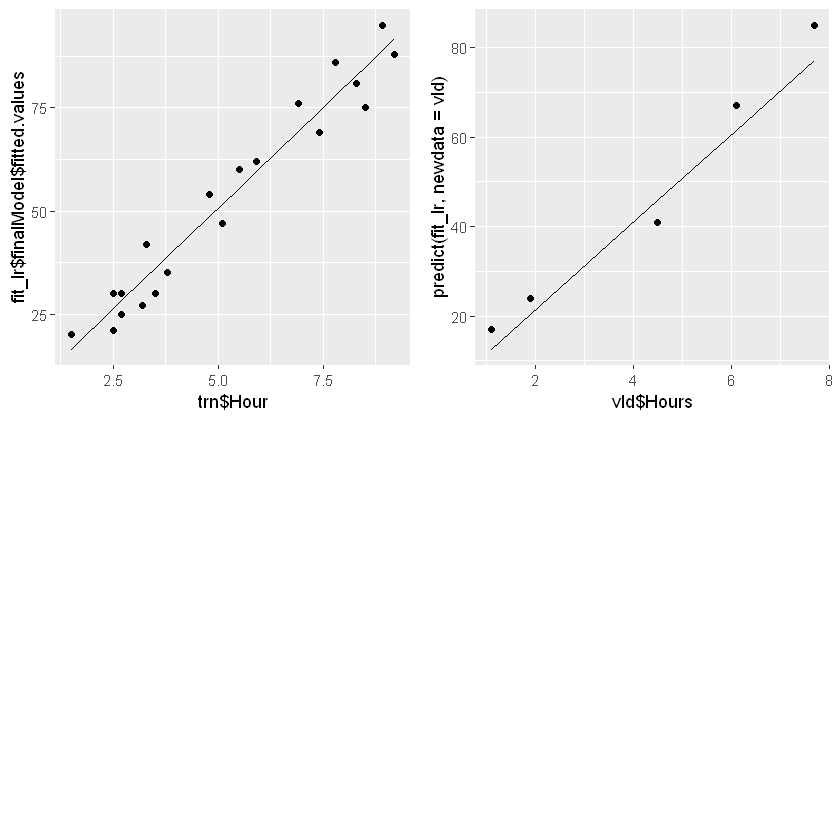

In [29]:
library(gridExtra)
p1 <- ggplot(data=trn) + geom_line(aes(x=trn$Hour,y=fit_lr$finalModel$fitted.values)) + geom_point(data=trn,aes(x=trn$Hours,y=trn$Scores))
p2 <- ggplot(data=vld) + geom_line(aes(x=vld$Hours,y=predict(fit_lr,newdata=vld))) + geom_point(data=vld,aes(x=vld$Hours,y=vld$Scores))
grid.arrange(p1,p2,nrow=2,ncol=2)